In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as met
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn  as sns

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
x = housing.data
y = housing.target

In [4]:
df = pd.DataFrame(x, columns=housing.feature_names)

In [5]:
df ['Price'] = y
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [25]:
#print(housing.DESCR)
print (housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


<ipython-input-8-14fdb7b8b205>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(331)


Text(0, 0.5, 'prices')

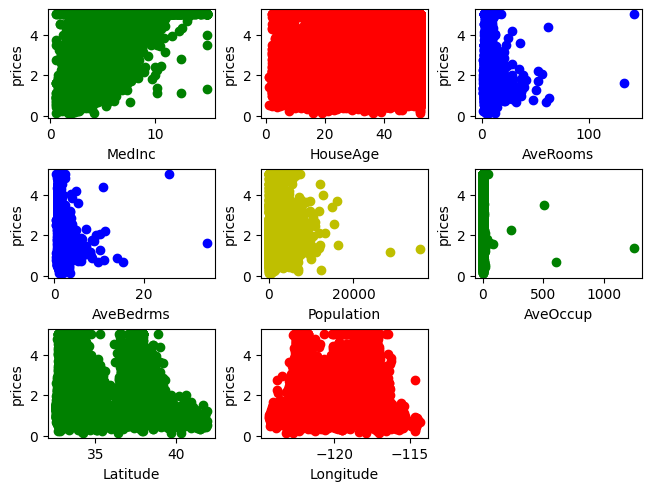

In [8]:
plt.subplots(layout="constrained")

plt.subplot(331)
plt.scatter(df.MedInc, df.Price, color='g')
plt.xlabel('MedInc')
plt.ylabel('prices')

plt.subplot(332)
plt.scatter(df.HouseAge, df.Price, color='r')
plt.xlabel('HouseAge')
plt.ylabel('prices')

plt.subplot(333)
plt.scatter(df.AveRooms, df.Price, color='b')
plt.xlabel('AveRooms')
plt.ylabel('prices')

plt.subplot(334)
plt.scatter(df.AveBedrms, df.Price, color='b')
plt.xlabel('AveBedrms')
plt.ylabel('prices')

plt.subplot(335)
plt.scatter(df.Population, df.Price, color='y')
plt.xlabel('Population')
plt.ylabel('prices')

plt.subplot(336)
plt.scatter(df.AveOccup, df.Price, color='g')
plt.xlabel('AveOccup')
plt.ylabel('prices')

plt.subplot(337)
plt.scatter(df.Latitude, df.Price, color='g')
plt.xlabel('Latitude')
plt.ylabel('prices')

plt.subplot(338)
plt.scatter(df.Longitude, df.Price, color='r')
plt.xlabel('Longitude')
plt.ylabel('prices')

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
xtrain.shape

(14448, 8)

In [11]:
xtest.shape

(6192, 8)

In [12]:
ytrain.shape

(14448,)

In [13]:
ytest.shape

(6192,)

In [14]:
model = LinearRegression()

In [15]:
model.fit(xtrain , ytrain)

LinearRegression()

In [16]:
ypred = model.predict(xtest)
ypred.shape

(6192,)

In [18]:
met.mean_squared_error(ytest,ypred)

0.5305677824766757

In [19]:
model.intercept_

-37.05624133152496

In [20]:
model.coef_

array([ 4.45822565e-01,  9.68186799e-03, -1.22095112e-01,  7.78599557e-01,
       -7.75740400e-07, -3.37002667e-03, -4.18536747e-01, -4.33687976e-01])

Text(0, 0.5, 'predicted prices')

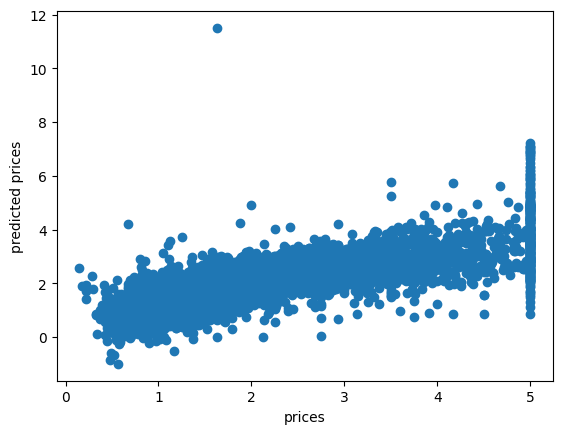

In [17]:
plt.scatter(ytest, ypred)
plt.xlabel('prices')
plt.ylabel('predicted prices')

<ipython-input-23-aca4e4b3ff49>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


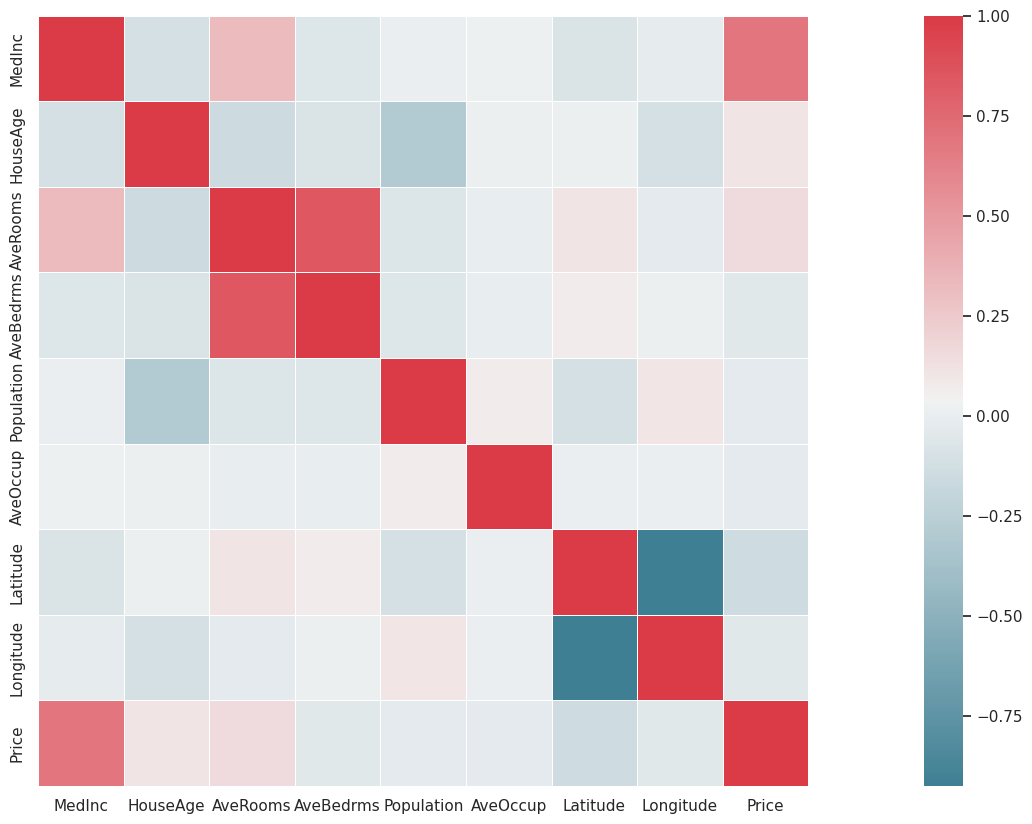

In [23]:
sns.set(style="white")

df_corr= df[:]
corr = df_corr.dropna().corr()
mask = np.zeros_like(corr, dtype=np.bool)
f, ax = plt.subplots(figsize=(30, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax);